# Working with Convolutions

### Introduction

So far, we have seen how neural networks allow us to train different weights and biases accross neurons, and across layers of neurons to perform tasks such as classifying images.  

For image data, it can help to include convolutional layers in our neural network.  Convolutional layers can help extract features from an image and produce a smaller dimensional output to pass to future layers. 

In this lesson, we'll learn about how a convolutional layer works and apply the kernel of a convolutional layer to an image. 

### Convolutions

We can get a sense of how convolutional neural networks work by looking at the image below.

<img src="convolution-kernel.png" width="80%">

> From [A Guide to Convolution Arithmetic for Deep Learning](https://arxiv.org/abs/1603.07285).

The large $4x4$ blue grid on the bottom represents an image from a dataset.  Going from left to right, we can see that a dark blue $3x3$ grid is scanning over our image.  This shaded blue grid is the **kernel**.  The kernel outputs information it extracts from a region into an entry in the green matrix above.  The green matrix on top is called **activation map**.  The region that it is scanning over at any given time is called the **receptive field**.

So to summarize, we start with an image, which is a matrix of pixels.  We scan our kernel over our image which translates each scanned region into an entry of our activation layer.  

> Then **what's a convolution?**  A convolution is a mathematical operation on two functions (f and g) that produces a third function ({\displaystyle f*g}f*g) expressing how the shape of one is modified by the other.

> [Wikipedia Convolution](https://en.wikipedia.org/wiki/Convolution)

> So here, the convolution is the operation of applying the kernel to our image that so that we get an output of the activation map.

What kind of information is extracted in our activation map?  Well, let's imagine we have a kernel that detects whether there is an edge of an vertical line in a given region.  Our kernel would first be applied to the top left region, and if it detects that *there is in fact* a horizontal line, it would translate this to a large positive number in the top left corner of the activation layer.     

### Show me the code

Ok, enough explaining.  Let's load up an image and see how this works.  We'll start by selecting an image from our MNIST dataset.

In [60]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [61]:
first_image = X[0].reshape(28, 28)
first_image.shape

(28, 28)

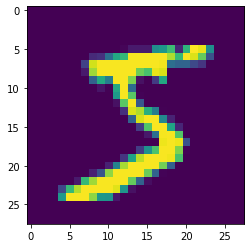

In [62]:
from matplotlib.pyplot import imshow

imshow(first_image)

We can see that our first image is the number five, and as we know that the light lines are represented by pixels with largers numbers.

> We can use the code below to see both the pixels and represented colors of the first few rows of our image.

In [50]:
import pandas as pd
df = pd.DataFrame(first_image[3:15]).astype('int')
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
3,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
4,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
5,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0


### Applying a kernel

Ok, so that's an image, now let's see a kernel.

In [12]:
import numpy as np
kernel = np.array([[-1, 0, 1],
       [ -1,  0,  1],
       [ -1,  0,  1]])
kernel

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

> Our kernel is always a square matrix.  It generally ranges from size 3x3 to 7x7.  Because our kernel is square, we can define the kernel size with a single number. For the kernel above, the kernel size is 3.

Now let's apply a kernel to a region of our image.  To do so, we perform entrywise multiplication, and then add up the resulting numbers.  For example, let's select a region in the middle of the top edge of the number five.

In [64]:
dark_region = df.iloc[3:6, 13:16]
dark_region.style.background_gradient('Greys')

,13,14,15
3,253,253,253
4,253,253,253
5,253,198,182


And then apply the kernel to the region.  

In [65]:
mult = kernel*dark_region
mult.to_numpy().sum()

-71

So above, we get back a number that is significant, but not extremely large.  This makes sense.  Remember  that our `kernel` is filled with negative ones on the left column and positive ones on the right column.

In [66]:
kernel

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

So when applied to region entirely with large numbers, the positive and negative columns tend to cancel each other out.

In [67]:
kernel*dark_region

,13,14,15
3,-253,0,253
4,-253,0,253
5,-253,0,182


Before moving on, let's translate our operation into a function so that we can easily apply our kernel to another region.

In [68]:
def apply_kernel(kernel, region):
    mult = kernel*region
    return mult.to_numpy().sum()

This time, if we apply the kernel to a region where only the right side has large numbers, the regions won't cancel each other out and the sum will be fairly large.

In [69]:
left_edge = df.iloc[7:10, 10:13]
left_edge

,10,11,12
7,1,154,253
8,0,139,253
9,0,11,190


In [70]:
apply_kernel(kernel, left_edge)

695

So by applying the kernel to the two regions, we can see how the result can, in this case, summarize the whether a region has a left edge.  And remember, that we'll apply this kernel throughout the image so it can detect where this particular feature exists in the image.

Let's see this.

In [51]:
image_df = pd.DataFrame(first_image)

> We create a grid of x and y coordinates so we can select and apply our kernel to different regions of the image.

In [71]:
coords = [x_coord for x_coord in range(first_image.shape[0])][1:-1]


In [72]:
combos = [[(x_coord, y_coord) for x_coord in coords] for y_coord in coords]

> Then we apply the kernel to each of these regions.

In [73]:
activation_grid = [apply_kernel(kernel, image_df.loc[x-1:x+1, y-1:y+1])
           for row in combos for x,y in row]

And display the result.

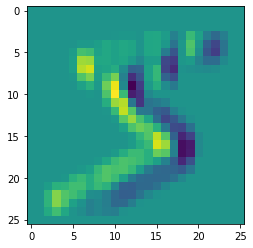

In [74]:
imshow(np.array(activation_grid).reshape(26, 26).T)

So we can see that this kernel results in an activation map that highlights the left edge of our number with large positive numbers and the right edge with negative numbers.

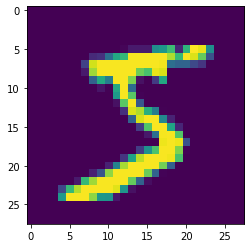

In [59]:
imshow(first_image)

### Wrapping Up

Let's point out a couple of items before wrapping up the lesson.

1. Kernels are found through gradient descent

So far, we have inputted a specific 3x3 kernels to produce an activation map highlighting a specific feature.  But in a real neural network, the data scientist only specifies the dimensions of the kernel, and then the weights of the kernel are then found through gradient descent.  This way, the neural network (and not the data scientist) determines which kernel weights allow for network to minimize the cost function.

2. Multiple Kernels per layer

Just like we have multiple neurons in a linear layer of a neural network, we'll have multiple kernels in a convolutional layer of our neural network.  And if we have three different kernels in a layer, this means that single layer will return three different activation maps.  We can think of each activation map as a feature, and the these features from a layer can then be passed to the next layer of the network.

### Summary

In this lesson, we learned about how kernels can be used to extract features from an image.  A kernel is a square matrix that is applied to different regions of our image, and performs entrywise multiplication followed by a sum to extract information about a region.   The result of applying a kernel to our image is an activation map.  A single layer can have multiple kernels, each of which produces it's own activation map when applied to an image.  These maps are fed to the next layer in the neural network.